In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests

In [133]:
reps_df = pd.read_excel('dados_reps.xlsx')
reps_df

,Republica,Instagram
0,LawLaw,replawlaw
1,Sparta,republicasparta
2,Xeque,rep.xequemate
3,Doriana,repdoriana
4,Loks,rep.loks
5,Selvagem,republicaselvagem
6,Sua Mae,republicasuamae
7,Albertina,reptiaalbertina
8,Arapuca,rep_arapucarp
9,12 Doses,rep12doses


In [134]:
followers_list = []

for ig in reps_df['Instagram'].values:
    response_profile = requests.get('https://www.instagram.com/' + ig).text
    followers = re.findall(r'"userInteractionCount":"[0-9]+"}', response_profile)[1]
    followers_list.append(int(re.findall(r'\d+', followers)[0]))

reps_df['Seguidores'] = followers_list
reps_df


,Republica,Instagram,Seguidores
0,LawLaw,replawlaw,3606
1,Sparta,republicasparta,10643
2,Xeque,rep.xequemate,3716
3,Doriana,repdoriana,3364
4,Loks,rep.loks,3368
5,Selvagem,republicaselvagem,2228
6,Sua Mae,republicasuamae,3048
7,Albertina,reptiaalbertina,3699
8,Arapuca,rep_arapucarp,4081
9,12 Doses,rep12doses,6088


In [135]:
graph_rep = reps_df.sort_values(['Seguidores'], ascending=False)
graph_rep

,Republica,Instagram,Seguidores
1,Sparta,republicasparta,10643
9,12 Doses,rep12doses,6088
10,Tcheca,reptchecarp,4130
8,Arapuca,rep_arapucarp,4081
2,Xeque,rep.xequemate,3716
7,Albertina,reptiaalbertina,3699
0,LawLaw,replawlaw,3606
4,Loks,rep.loks,3368
3,Doriana,repdoriana,3364
14,SOS,republicasosrp,3223


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


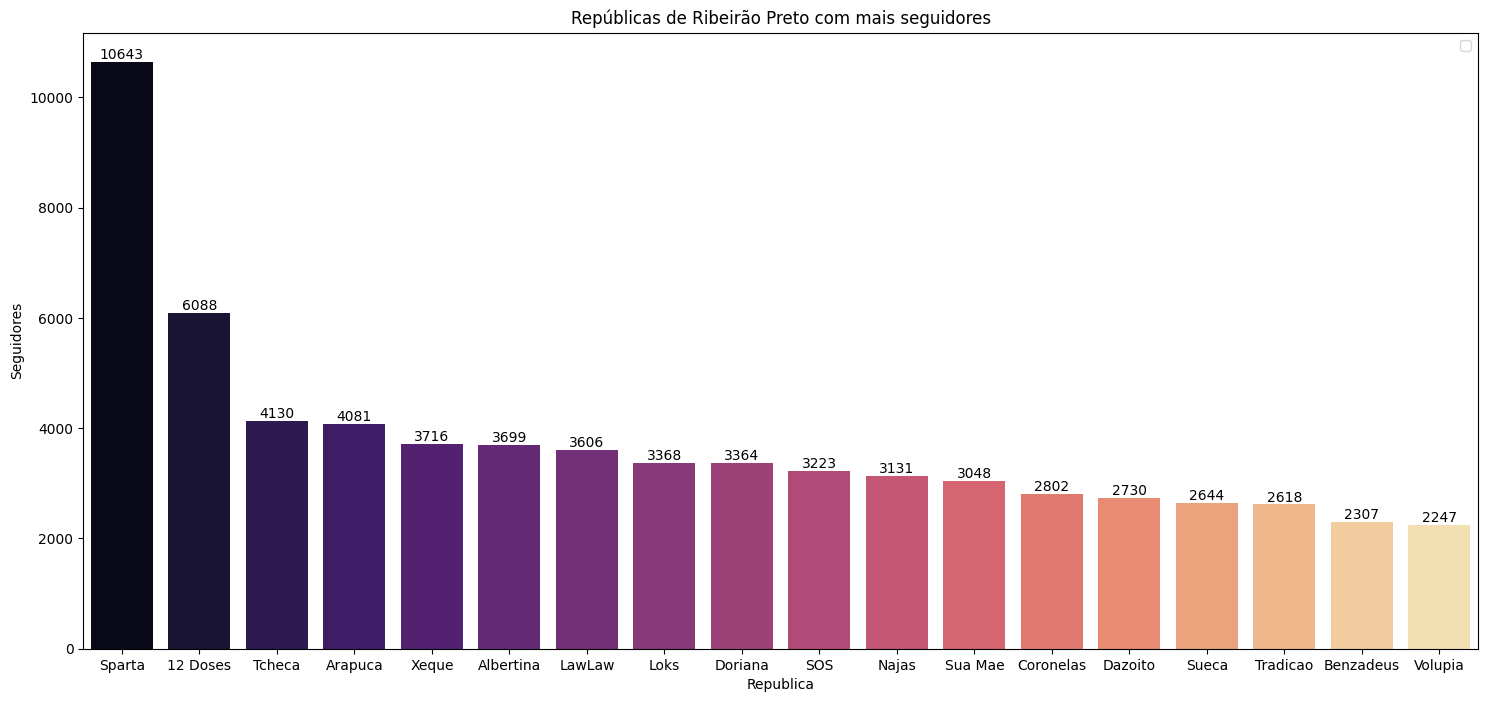

In [136]:
plt.subplots(figsize=(18, 8))
ax = sns.barplot(x = graph_rep['Republica'][0:18], y = graph_rep['Seguidores'][0:18], palette = 'magma')
plt.title('Repúblicas de Ribeirão Preto com mais seguidores')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig('followers_repsrp.png', dpi = 300, orientation = 'horizontal')
plt.legend()
plt.show()